# Arrhythmya Data Set

Эта база данных содержит 279 атрибутов, из которых 206 являются линейными, а остальные - номинальными.

Что касается исследования H. Altay Guvenir: «Цель состоит в том, чтобы различать наличие и отсутствие сердечной аритмии и классифицировать ее в одной из 16 групп. Класс 01 относится к «нормальным» классам ЭКГ, Класс с 02 по 15 относится к разным классам аритмии и класс 16 относится к остальным неклассифицированным. В настоящее время существует компьютерная программа, которая делает такую классификацию. Однако существуют различия между классификацией кардиологов и программ. Принимая кардиолога как золотой стандарт, мы стремимся  свести к минимуму эту разницу с помощью средств машинного обучения».

Имена и идентификационные номера пациентов были недавно удалены из базы данных. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Подгружаем библиотеки

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
#data = pd.read_csv(url, sep = ', ', engine='python')
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', sep = ',', engine = 'python', header = None)

Загружаем данные

In [3]:
type(data)

pandas.core.frame.DataFrame

Посмотрим на тип данных, с которыми будем работать

In [4]:
print(data.shape)

(452, 280)


Посмотрим, сколько же столбцов и строк данных нам досталось в тренировочной выборке. 280 столбцов(атрибуты) и 452 строки (сами объекты)

In [5]:
data.columns = ["Age", "Sex", "Height", "Weight", "QRS_duration", "P-R_interval", "Q-T_interval", "T_interval",
                "P_interval", "QRS", "T", "P", "QRST", "J", "Heart_rate", "Channel_DI:_Q_wave",
                "DI:R_wave", "DI:S_wave", "DI:R'_wave", "DI:S'_wave", "DI:Number_of_intrinsic_deflections", "DI:Existence_of_ragged_R_wave", "DI:Existence_of_diphasic_derivation_of_R_wave", "DI:Existence_of_ragged_P_wave",
                "DI:Existence_of_diphasic_derivation_of_P_wave", "DI:Existence_of_ragged_T_wave", "DI:Existence_of_diphasic_derivation_of_T_wave", "Channel_DII:_Q_wave",
                "DII:R_wave", "DII:S_wave", "DII:R'_wave", "DII:S'_wave", "DII:Number_of_intrinsic_deflections", "DII:Existence_of_ragged_R_wave", "DII:Existence_of_diphasic_derivation_of_R_wave", "DII:Existence_of_ragged_P_wave",
                "DII:Existence_of_diphasic_derivation_of_P_wave", "DII:Existence_of_ragged_T_wave", "DII:Existence_of_diphasic_derivation_of_T_wave", "Channel_DIII:_Q_wave",
                "DIII:R_wave", "DIII:S_wave", "DIII:R'_wave", "DIII:S'_wave", "DIII:Number_of_intrinsic_deflections", "DIII:Existence_of_ragged_R_wave", "DIII:Existence_of_diphasic_derivation_of_R_wave", "DIII:Existence_of_ragged_P_wave",
                "DIII:Existence_of_diphasic_derivation_of_P_wave", "DIII:Existence_of_ragged_T_wave", "DIII:Existence_of_diphasic_derivation_of_T_wave", "Channel_AVR:_Q_wave",
                "AVR:R_wave", "AVR:S_wave", "AVR:R'_wave", "AVR:S'_wave", "AVR:Number_of_intrinsic_deflections", "AVR:Existence_of_ragged_R_wave", "AVR:Existence_of_diphasic_derivation_of_R_wave", "AVR:Existence_of_ragged_P_wave",
                "AVR:Existence_of_diphasic_derivation_of_P_wave", "AVR:Existence_of_ragged_T_wave", "AVR:Existence_of_diphasic_derivation_of_T_wave", "Channel_AVL:_Q_wave",
                "AVL:R_wave", "AVL:S_wave", "AVL:R'_wave", "AVL:S'_wave", "AVL:Number_of_intrinsic_deflections", "AVL:Existence_of_ragged_R_wave", "AVL:Existence_of_diphasic_derivation_of_R_wave", "AVL:Existence_of_ragged_P_wave",
                "AVL:Existence_of_diphasic_derivation_of_P_wave", "AVL:Existence_of_ragged_T_wave", "AVL:Existence_of_diphasic_derivation_of_T_wave", "Channel_AVF:_Q_wave",
                "AVF:R_wave", "AVF:S_wave", "AVF:R'_wave", "AVF:S'_wave", "AVF:Number_of_intrinsic_deflections", "AVF:Existence_of_ragged_R_wave", "AVF:Existence_of_diphasic_derivation_of_R_wave", "AVF:Existence_of_ragged_P_wave",
                "AVF:Existence_of_diphasic_derivation_of_P_wave", "AVF:Existence_of_ragged_T_wave", "AVF:Existence_of_diphasic_derivation_of_T_wave", "Channel_V1:_Q_wave",
                "V1:R_wave", "V1:S_wave", "V1:R'_wave", "V1:S'_wave", "V1:Number_of_intrinsic_deflections", "V1:Existence_of_ragged_R_wave", "V1:Existence_of_diphasic_derivation_of_R_wave", "V1:Existence_of_ragged_P_wave",
                "V1:Existence_of_diphasic_derivation_of_P_wave", "V1:Existence_of_ragged_T_wave", "V1:Existence_of_diphasic_derivation_of_T_wave", "Channel_V2:_Q_wave",
                "V2:R_wave", "V2:S_wave", "V2:R'_wave", "V2:S'_wave", "V2:Number_of_intrinsic_deflections", "V2:Existence_of_ragged_R_wave", "V2:Existence_of_diphasic_derivation_of_R_wave", "V2:Existence_of_ragged_P_wave",
                "V2:Existence_of_diphasic_derivation_of_P_wave", "V2:Existence_of_ragged_T_wave", "V2:Existence_of_diphasic_derivation_of_T_wave", "Channel_V3:_Q_wave",
                "V3:R_wave", "V3:S_wave", "V3:R'_wave", "V3:S'_wave", "V3:Number_of_intrinsic_deflections", "V3:Existence_of_ragged_R_wave", "V3:Existence_of_diphasic_derivation_of_R_wave", "V3:Existence_of_ragged_P_wave",
                "V3:Existence_of_diphasic_derivation_of_P_wave", "V3:Existence_of_ragged_T_wave", "V3:Existence_of_diphasic_derivation_of_T_wave", "Channel_V4:_Q_wave",
                "V4:R_wave", "V4:S_wave", "V4:R'_wave", "V4:S'_wave", "V4:Number_of_intrinsic_deflections", "V4:Existence_of_ragged_R_wave", "V4:Existence_of_diphasic_derivation_of_R_wave", "V4:Existence_of_ragged_P_wave",
                "V4:Existence_of_diphasic_derivation_of_P_wave", "V4:Existence_of_ragged_T_wave", "V4:Existence_of_diphasic_derivation_of_T_wave", "Channel_V5:_Q_wave",
                "V5:R_wave", "V5:S_wave", "V5:R'_wave", "V5:S'_wave", "V5:Number_of_intrinsic_deflections", "V5:Existence_of_ragged_R_wave", "V5:Existence_of_diphasic_derivation_of_R_wave", "V5:Existence_of_ragged_P_wave",
                "V5:Existence_of_diphasic_derivation_of_P_wave", "V5:Existence_of_ragged_T_wave", "V5:Existence_of_diphasic_derivation_of_T_wave", "Channel_V6:_Q_wave",
                "V6:R_wave", "V6:S_wave", "V6:R'_wave", "V6:S'_wave", "V6:Number_of_intrinsic_deflections", "V6:Existence_of_ragged_R_wave", "V6:Existence_of_diphasic_derivation_of_R_wave", "V6:Existence_of_ragged_P_wave",
                "V6:Existence_of_diphasic_derivation_of_P_wave", "V6:Existence_of_ragged_T_wave", "V6:Existence_of_diphasic_derivation_of_T_wave", "Channel_DI:_JJ_wave",
                "Channel_DI:Q_wave", "Channel_DI:R_wave", "Channel_DI:S_wave", "Channel_DI:R'_wave", "Channel_DI:S'_wave", "Channel_DI:P_wave", "Channel_DI:T_wave", "Channel_DI:QRSA",
                "Channel_DI:QRSTA", "Channel_DII:_JJ_wave",
                "Channel_DII:Q_wave", "Channel_DII:R_wave", "Channel_DII:S_wave", "Channel_DII:R'_wave", "Channel_DII:S'_wave", "Channel_DII:P_wave", "Channel_DII:T_wave", "Channel_DII:QRSA",
                "Channel_DII:QRSTA", "Channel_DIII:_JJ_wave",
                "Channel_DIII:Q_wave", "Channel_DIII:R_wave", "Channel_DIII:S_wave", "Channel_DIII:R'_wave", "Channel_DIII:S'_wave", "Channel_DIII:P_wave", "Channel_DIII:T_wave", "Channel_DIII:QRSA",
                "Channel_DIII:QRSTA", "Channel_AVR:_JJ_wave",
                "Channel_AVR:Q_wave", "Channel_AVR:R_wave", "Channel_AVR:S_wave", "Channel_AVR:R'_wave", "Channel_AVR:S'_wave", "Channel_AVR:P_wave", "Channel_AVR:T_wave", "Channel_AVR:QRSA",
                "Channel_AVR:QRSTA", "Channel_AVL:_JJ_wave",
                "Channel_AVL:Q_wave", "Channel_AVL:R_wave", "Channel_AVL:S_wave", "Channel_AVL:R'_wave", "Channel_AVL:S'_wave", "Channel_AVL:P_wave", "Channel_AVL:T_wave", "Channel_AVL:QRSA", 
                "Channel_AVL:QRSTA", "Channel_AVF:_JJ_wave",
                "Channel_AVF:Q_wave", "Channel_AVF:R_wave", "Channel_AVF:S_wave", "Channel_AVF:R'_wave", "Channel_AVF:S'_wave", "Channel_AVF:P_wave", "Channel_AVF:T_wave", "Channel_AVF:QRSA",
                "Channel_AVF:QRSTA", "Channel_V1:_JJ_wave",
                "Channel_V1:Q_wave", "Channel_V1:R_wave", "Channel_V1:S_wave", "Channel_V1:R'_wave", "Channel_V1:S'_wave", "Channel_V1:P_wave", "Channel_V1:T_wave", "Channel_V1:QRSA",
                "Channel_V1:QRSTA", "Channel_V2:_JJ_wave",
                "Channel_V2:Q_wave", "Channel_V2:R_wave", "Channel_V2:S_wave", "Channel_V2:R'_wave", "Channel_V2:S'_wave", "Channel_V2:P_wave", "Channel_V2:T_wave", "Channel_V2:QRSA",
                "Channel_V2:QRSTA", "Channel_V3:_JJ_wave",
                "Channel_V3:Q_wave", "Channel_V3:R_wave", "Channel_V3:S_wave", "Channel_V3:R'_wave", "Channel_V3:S'_wave", "Channel_V3:P_wave", "Channel_V3:T_wave", "Channel_V3:QRSA",
                "Channel_V3:QRSTA", "Channel_V4:_JJ_wave",
                "Channel_V4:Q_wave", "Channel_V4:R_wave", "Channel_V4:S_wave", "Channel_V4:R'_wave", "Channel_V4:S'_wave", "Channel_V4:P_wave", "Channel_V4:T_wave", "Channel_V4:QRSA",
                "Channel_V4:QRSTA", "Channel_V5:_JJ_wave",
                "Channel_V5:Q_wave", "Channel_V5:R_wave", "Channel_V5:S_wave", "Channel_V5:R'_wave", "Channel_V5:S'_wave", "Channel_V5:P_wave", "Channel_V5:T_wave", "Channel_V5:QRSA",
                "Channel_V5:QRSTA", "Channel_V6:_JJ_wave",
                "Channel_V6:Q_wave", "Channel_V6:R_wave", "Channel_V6:S_wave", "Channel_V6:R'_wave", "Channel_V6:S'_wave", "Channel_V6:P_wave", "Channel_V6:T_wave", "Channel_V6:QRSA",
                "Channel_V6:QRSTA", "Class_code"]
data

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [6]:
print(data)

     Age  Sex  Height  Weight  QRS_duration  P-R_interval  Q-T_interval  \
0     75    0     190      80            91           193           371   
1     56    1     165      64            81           174           401   
2     54    0     172      95           138           163           386   
3     55    0     175      94           100           202           380   
4     75    0     190      80            88           181           360   
5     13    0     169      51           100           167           321   
6     40    1     160      52            77           129           377   
7     49    1     162      54            78             0           376   
8     44    0     168      56            84           118           354   
9     50    1     167      67            89           130           383   
10    62    0     170      72           102           135           401   
11    45    1     165      86            77           143           373   
12    54    1     172    

In [7]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Посмотрим на первые 5 строк таблицы

In [8]:
data.tail()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


Уделим внимание и последним 5ти строкам таблицы

In [9]:
type(data['QRS'])

pandas.core.series.Series

Посмотрим на тип данных QRS

In [10]:
print(data.columns)

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS_duration', 'P-R_interval',
       'Q-T_interval', 'T_interval', 'P_interval', 'QRS',
       ...
       'Channel_V6:Q_wave', 'Channel_V6:R_wave', 'Channel_V6:S_wave',
       'Channel_V6:R'_wave', 'Channel_V6:S'_wave', 'Channel_V6:P_wave',
       'Channel_V6:T_wave', 'Channel_V6:QRSA', 'Channel_V6:QRSTA',
       'Class_code'],
      dtype='object', length=280)


Посмотрим название столбцов

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class_code
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


Теперь посмотрим общую информацию о нашей обучающей выборке

In [12]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Теперь стоит посмотреть общие статистические характеристики наших количественных признаков. Как видно, здесь отсутствует столбец с классом (т.к. этот признак не является количественным)

In [13]:
data.describe(include = 'all')

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000


Если мы допишем include = 'all', можно будет посмотреть статистику по всем-всем признакам(новая табличка будет иметь пустые поля(NaN), так как разные типы данных имеют разные характеристики)

In [14]:
data.corr()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
Age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
Sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
Height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
Weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
QRS_duration,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.323879
P-R_interval,0.041149,-0.046771,0.013601,0.119826,0.021831,1.000000,0.079371,0.074618,0.670865,-0.012412,...,-0.005347,0.003411,-0.074180,0.068594,NaN,0.143272,0.061160,-0.027691,0.021048,-0.099954
Q-T_interval,0.195691,0.072052,-0.237314,0.118657,0.218681,0.079371,1.000000,0.166711,0.063044,-0.031786,...,0.035215,0.121349,0.116718,-0.002351,NaN,-0.034971,-0.038884,0.256200,0.150979,0.028305
T_interval,0.025654,-0.184736,-0.038411,0.149987,0.397435,0.074618,0.166711,1.000000,0.060302,-0.099283,...,-0.068035,0.070535,-0.046868,0.008556,NaN,0.049175,-0.184846,0.130202,-0.014430,0.097625
P_interval,0.099755,-0.081051,0.029025,0.120668,0.049682,0.670865,0.063044,0.060302,1.000000,-0.062760,...,-0.010142,0.007886,-0.091258,0.096772,NaN,0.248092,0.016054,-0.016365,0.004283,-0.122003
QRS,-0.265868,0.069434,0.061539,-0.173355,-0.146043,-0.012412,-0.031786,-0.099283,-0.062760,1.000000,...,-0.179725,0.292155,0.295283,-0.071495,NaN,0.082009,0.063300,0.297780,0.255203,0.019585


Стоит посмотреть на таблицу корреляции между признаками. Видим значительную корреляцию между признаками QRS_duration и T_interval (корреляционный коэфициент = 0.22)

In [15]:
data[data["Class_code"] == 1].corr()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
Age,1.000000,-0.039996,0.028553,0.147534,-0.039277,0.014155,0.147931,-0.141568,0.143373,-0.291343,...,0.184166,-0.139954,-0.072960,0.117679,NaN,0.121564,-0.217586,-0.099202,-0.209804,NaN
Sex,-0.039996,1.000000,-0.680434,-0.366834,-0.495170,-0.030267,0.059754,-0.215439,-0.078311,0.073044,...,0.170211,-0.064868,0.105647,-0.006996,NaN,0.054125,-0.005766,-0.026246,-0.057901,NaN
Height,0.028553,-0.680434,1.000000,0.466169,0.432668,0.061645,-0.037434,0.122146,0.110598,-0.105555,...,-0.229226,0.046513,-0.113698,0.052204,NaN,-0.042880,-0.033616,-0.010291,-0.008129,NaN
Weight,0.147534,-0.366834,0.466169,1.000000,0.370781,0.135886,0.125594,0.261270,0.162612,-0.244197,...,0.018293,-0.008153,-0.194475,0.034074,NaN,-0.070185,-0.151733,-0.022536,-0.085924,NaN
QRS_duration,-0.039277,-0.495170,0.432668,0.370781,1.000000,0.033063,0.112729,0.276111,0.123714,-0.037856,...,-0.358609,0.195390,-0.265009,0.036959,NaN,0.094835,0.027133,0.036647,0.077418,NaN
P-R_interval,0.014155,-0.030267,0.061645,0.135886,0.033063,1.000000,0.113719,0.024241,0.713299,0.044931,...,-0.026621,0.070146,-0.087258,0.072194,NaN,-0.079085,0.050316,0.023701,0.049547,NaN
Q-T_interval,0.147931,0.059754,-0.037434,0.125594,0.112729,0.113719,1.000000,0.092308,0.127241,0.031926,...,-0.080745,0.092351,0.011830,0.027910,NaN,0.005815,0.109337,0.097180,0.133728,NaN
T_interval,-0.141568,-0.215439,0.122146,0.261270,0.276111,0.024241,0.092308,1.000000,0.025554,-0.078212,...,-0.042996,0.107654,-0.136126,0.089630,NaN,-0.062456,0.263620,0.011873,0.239975,NaN
P_interval,0.143373,-0.078311,0.110598,0.162612,0.123714,0.713299,0.127241,0.025554,1.000000,0.018479,...,-0.070201,0.034561,-0.115796,0.103654,NaN,0.066733,-0.009650,0.011279,0.011595,NaN
QRS,-0.291343,0.073044,-0.105555,-0.244197,-0.037856,0.044931,0.031926,-0.078212,0.018479,1.000000,...,-0.272205,0.379836,0.271368,-0.110602,NaN,0.035507,0.105416,0.366550,0.313242,NaN


Посмотрим корреляцию признаков для здоровых пациентов (класс 1)

In [16]:
data[(data["Class_code"] > 1) & (data["Class_code"] < 16)].corr()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
Age,1.000000,-0.033530,-0.171231,0.562542,-0.014569,0.120577,0.228323,0.105407,0.120624,-0.280367,...,0.173329,-0.181585,0.205808,0.068305,NaN,-0.094931,-0.331654,0.133475,-0.184427,-0.227007
Sex,-0.033530,1.000000,-0.040958,-0.132969,-0.189365,-0.076556,0.093400,-0.092111,-0.124480,0.051458,...,0.263000,-0.075158,0.051117,0.082623,NaN,-0.064765,-0.009635,0.039724,0.011248,0.015442
Height,-0.171231,-0.040958,1.000000,-0.189620,-0.074962,0.005592,-0.299661,-0.081091,0.028687,0.108246,...,0.010651,-0.103400,-0.090593,-0.018228,NaN,0.124460,0.014865,-0.112593,-0.110647,-0.050510
Weight,0.562542,-0.132969,-0.189620,1.000000,0.002568,0.082153,0.133832,0.118879,0.073721,-0.119670,...,0.064465,-0.011283,0.184575,0.079858,NaN,-0.002677,-0.180102,0.148772,-0.025270,-0.182346
QRS_duration,-0.014569,-0.189365,-0.074962,0.002568,1.000000,0.044321,0.289812,0.376384,0.068346,-0.166906,...,-0.084339,0.105365,-0.191771,-0.047002,NaN,-0.163717,-0.196164,0.239007,-0.017518,0.240567
P-R_interval,0.120577,-0.076556,0.005592,0.082153,0.044321,1.000000,0.072119,0.144740,0.598073,-0.063449,...,0.055936,-0.071451,-0.117439,0.071252,NaN,0.396565,0.056120,-0.099678,-0.046946,-0.260684
Q-T_interval,0.228323,0.093400,-0.299661,0.133832,0.289812,0.072119,1.000000,0.221774,0.051621,-0.077555,...,0.080216,0.140378,0.157716,-0.045345,NaN,-0.038915,-0.126284,0.350090,0.164403,0.083236
T_interval,0.105407,-0.092111,-0.081091,0.118879,0.376384,0.144740,0.221774,1.000000,0.110083,-0.103478,...,-0.007014,0.111121,0.029701,-0.066668,NaN,0.128902,-0.289037,0.263304,-0.030011,-0.093911
P_interval,0.120624,-0.124480,0.028687,0.073721,0.068346,0.598073,0.051621,0.110083,1.000000,-0.144486,...,0.055275,-0.008071,-0.122226,0.103023,NaN,0.379724,0.006732,-0.049312,-0.035787,-0.176304
QRS,-0.280367,0.051458,0.108246,-0.119670,-0.166906,-0.063449,-0.077555,-0.103478,-0.144486,1.000000,...,-0.222295,0.216390,0.311454,-0.043538,NaN,0.111777,0.017570,0.244255,0.193286,0.095032


А теперь узнаем, какая корреляция между признаками у объектов которые относятся к классу известных типов аритмии у пациентов(классы 2-15) Заметим, что для больных пациентов корреляция между признаками QRS_duration и Q-T_interval выше, чем для остальных пациентов.

In [17]:
data[data["Class_code"] == 16].corr()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA,Class_code
Age,1.000000,-0.457152,0.303910,0.456330,0.228594,-0.263753,0.219904,0.130992,-0.291024,0.045364,...,0.126963,-0.083763,-0.412394,NaN,NaN,-0.478845,-0.173272,-0.207913,-0.286469,NaN
Sex,-0.457152,1.000000,-0.638948,-0.563844,-0.557108,-0.175180,-0.017605,-0.343809,-0.170331,0.024937,...,0.058526,0.166547,0.152578,NaN,NaN,0.166159,0.231299,0.167320,0.300143,NaN
Height,0.303910,-0.638948,1.000000,0.860906,0.390626,0.364246,-0.032150,0.166994,0.197879,-0.244700,...,-0.004106,-0.166731,0.079713,NaN,NaN,-0.296507,0.090920,-0.037930,0.024441,NaN
Weight,0.456330,-0.563844,0.860906,1.000000,0.262102,0.274300,-0.144051,0.057180,0.174085,-0.324443,...,0.048529,-0.304742,-0.160936,NaN,NaN,-0.200282,-0.048044,-0.254687,-0.224157,NaN
QRS_duration,0.228594,-0.557108,0.390626,0.262102,1.000000,0.161891,-0.012900,0.417767,0.174818,-0.077644,...,-0.292695,-0.056392,-0.011538,NaN,NaN,0.141901,-0.170142,-0.042101,-0.177226,NaN
P-R_interval,-0.263753,-0.175180,0.364246,0.274300,0.161891,1.000000,-0.103042,0.085447,0.859904,-0.142533,...,-0.256001,-0.061075,0.303788,NaN,NaN,0.143463,-0.028523,0.056364,0.032657,NaN
Q-T_interval,0.219904,-0.017605,-0.032150,-0.144051,-0.012900,-0.103042,1.000000,-0.113751,-0.318410,0.151956,...,0.139346,0.190652,0.275309,NaN,NaN,-0.272496,0.166212,0.333329,0.331679,NaN
T_interval,0.130992,-0.343809,0.166994,0.057180,0.417767,0.085447,-0.113751,1.000000,0.202515,0.147385,...,-0.230063,-0.246353,-0.256405,NaN,NaN,0.073535,-0.195100,-0.358737,-0.381143,NaN
P_interval,-0.291024,-0.170331,0.197879,0.174085,0.174818,0.859904,-0.318410,0.202515,1.000000,-0.025475,...,-0.274889,-0.131579,0.157235,NaN,NaN,0.436770,-0.201704,-0.057883,-0.155271,NaN
QRS,0.045364,0.024937,-0.244700,-0.324443,-0.077644,-0.142533,0.151956,0.147385,-0.025475,1.000000,...,0.200494,0.353432,0.071486,NaN,NaN,0.098152,-0.072000,0.320220,0.228715,NaN


А теперь заметим, что для неклассифицированных больных пациентов корреляция между QRS_duration и Q-T_interval отрицательна.

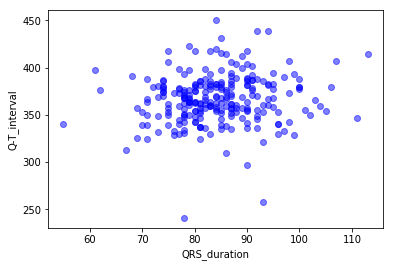

In [18]:
plt.plot(data[data["Class_code"] == 1]['QRS_duration'], data[data["Class_code"] == 1]['Q-T_interval'],'o', alpha = 0.5, color='blue')
plt.xlabel("QRS_duration")
plt.ylabel("Q-T_interval")
pass

Для удобства построим простую диаграмму рассеяния для класса здоровых пациентов для параметров QRS_duration и Q-T_interval. 

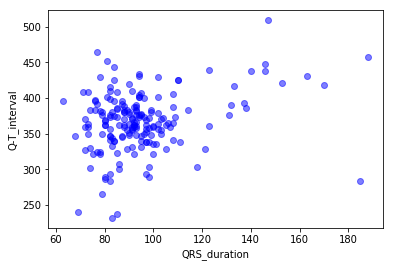

In [19]:
plt.plot(data[(data["Class_code"] > 1) & (data["Class_code"] < 16)]['QRS_duration'], data[(data["Class_code"] > 1) & (data["Class_code"] < 16)]['Q-T_interval'],'o', alpha = 0.5, color='blue')
plt.xlabel("QRS_duration")
plt.ylabel("Q-T_interval")
pass

Аналогичный график построим и для объектов из класса классифицированных больных пациентов. Заметим, что для многих объектов из этого класса характерно невысокое(относительно невысокое) значение QRS_duration и при этом различные значения Q-T_interval.

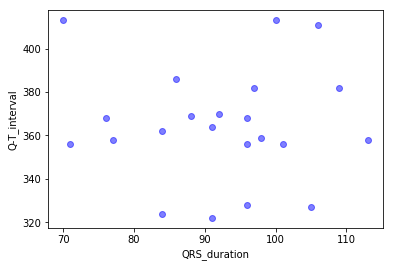

In [20]:
plt.plot(data[data["Class_code"] == 16]['QRS_duration'], data[data["Class_code"] == 16]['Q-T_interval'],'o', alpha = 0.5, color='blue')
plt.xlabel("QRS_duration")
plt.ylabel("Q-T_interval")
pass

Для неклассифицированных пациентов виден сильный разброс значений параметров QRS_duration и Q-T_interval. 

In [21]:
(data['QRS_duration'] > 100).head()

0    False
1    False
2     True
3    False
4    False
Name: QRS_duration, dtype: bool

Выведем первые 5 объектов, для которых значение QRS_duration больше 100

In [22]:
data['QRS_duration'].min()

55

Посмотрим минимальное значение для столбца QRS_duration

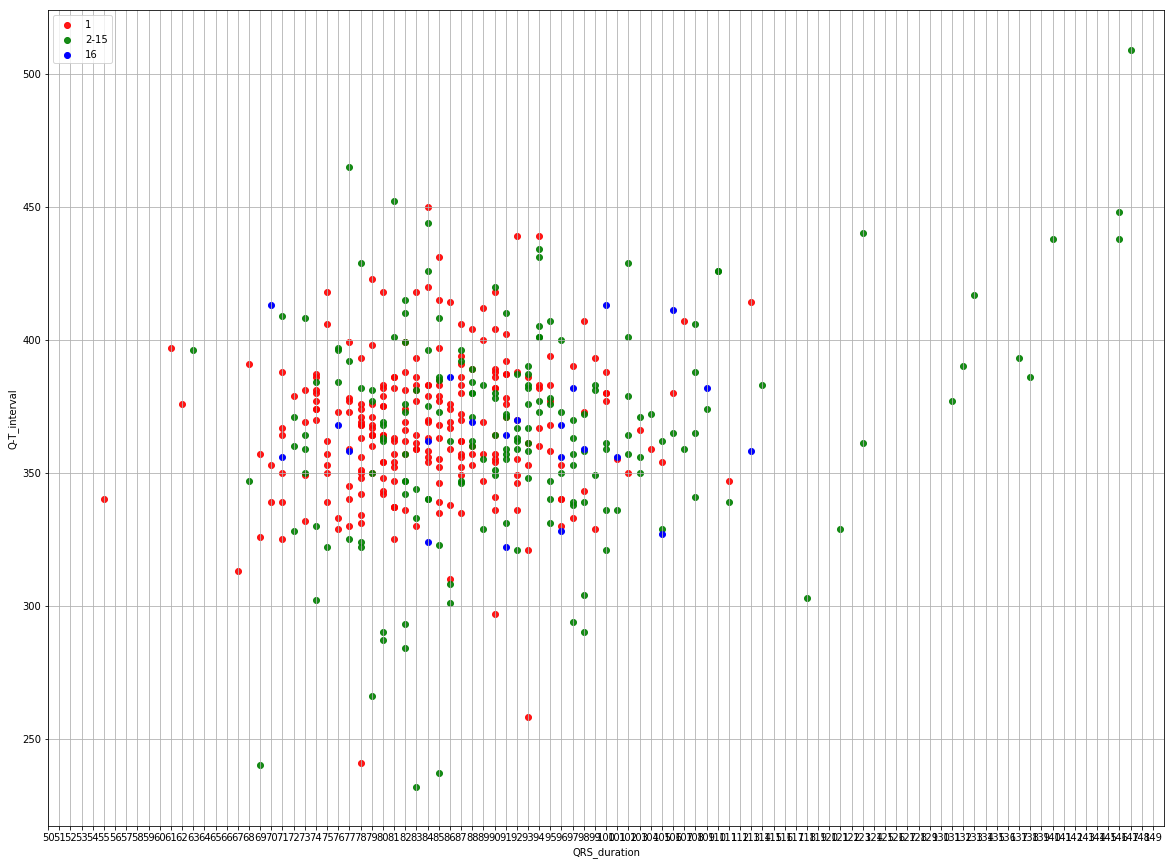

In [23]:
import operator
plt.figure(figsize = (20, 15))

plt.scatter(data[data['Class_code'] == 1]['QRS_duration'],
            data[data['Class_code'] == 1]['Q-T_interval'],
            alpha = 0.9,
            label = '1',
            color = 'r')

plt.scatter(data[operator.and_(data['Class_code'] > 1, data['Class_code'] < 16)]['QRS_duration'],
            data[operator.and_(data['Class_code'] > 1, data['Class_code'] < 16)]['Q-T_interval'],
            alpha = 0.9,
            label = '2-15',
            color = 'g')

plt.scatter(data[data['Class_code'] == 16]['QRS_duration'],
            data[data['Class_code'] == 16]['Q-T_interval'],
            label = '16',
            color = 'b')

plt.xlabel('QRS_duration')
plt.xticks(range(50, 150))
plt.xlim(50, 150)
plt.ylabel('Q-T_interval')
plt.legend()
plt.grid()

In [24]:
data['Class_code'].unique().shape

(13,)

In [25]:
data['Class_code'].shape

(452,)

Посмотрим, нет ли повторяющихся значений Class_code для разных объектов. Для этого сравним количество уникальных значений поля и количество всех значений. Понимаем, что есть повторяющиеся значения Class_code у каких-то элементов датасета.

In [26]:
y = np.array([0 if it == 1 else 1 if (it > 1 & it < 16) else 2 for it in data['Class_code']])

Поскольку наши классы делятся на 3 типа, вполне удобно и практично будет сделать этот признак тернарным: 0, если пациент здоров (класс 1), 1, если аритмия пациента классифицирована (классы 2-15), 2, есди аритмия пациента не классифицирована (класс 16).

In [27]:
data = data.drop(('Class_code'), axis=1)

In [28]:
print(y.shape)

(452,)


Храним выделенный признак в отдельном векторе

In [29]:
data.describe(include = ['object'])

,T,P,QRST,J,Heart_rate
count,452,452,452,452,452
unique,171,102,135,70,64
top,52,60,59,?,72
freq,13,23,9,376,21


Изучаем столбцы типа object

In [30]:
data.describe(include = 'all')

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:_JJ_wave,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000


Теперь смотрим статистику по всем столбцам

In [31]:
data['Heart_rate'].unique()

array(['63', '53', '75', '71', '?', '84', '70', '67', '64', '72', '73',
       '56', '76', '66', '77', '69', '68', '83', '79', '51', '81', '93',
       '80', '62', '82', '91', '89', '98', '78', '65', '59', '57', '104',
       '92', '54', '60', '86', '74', '50', '85', '103', '101', '61', '58',
       '138', '94', '96', '88', '115', '97', '102', '87', '55', '44',
       '100', '163', '124', '112', '123', '107', '117', '122', '49', '120'], dtype=object)

Смотрим уникальные значения признака Heart_rate и видим одно пропущенное

In [32]:
data['P_interval'].unique()

array([121,  39, 102, 143, 103,  91,  77,  70,  63,  73,  83,  65,  81,
       104,  94,  61,  52,  79, 183,  78,  82,  92,  60, 125,  99,  76,
       101,  80,  74, 107, 106,  84,  96,  71, 113, 105,  97,  68,  88,
         0,  54,  67,  75,  72,  87, 100, 108, 118, 117,  95,  98, 116,
       126,  85, 175,  89,  93, 144, 178,  90, 114, 132,  58, 127,  51,
        62,  86, 170, 149, 123, 111,  64, 137,  57, 109, 120, 122, 155,
       115,  42,  66,  69,  37, 204, 139, 110,  55, 205, 112, 181], dtype=int64)

Аналогично для P_interval с типом int64

In [33]:
for name in data['Age'].unique():
    print(name, data['Sex'][data["Age"] == name].iloc[0])

75 0
56 1
54 0
55 0
13 0
40 1
49 1
44 0
50 1
62 0
45 1
30 0
47 1
46 1
73 0
57 1
28 1
36 1
34 0
31 1
51 1
53 0
58 1
52 1
69 0
35 1
43 1
41 1
39 0
24 1
72 1
38 1
42 0
32 1
1 0
27 1
48 1
26 1
64 1
37 1
71 1
79 1
63 0
19 0
68 0
25 1
33 1
17 0
9 0
29 0
74 0
61 0
18 0
60 1
59 0
66 0
65 1
22 1
21 1
70 1
11 1
77 0
83 1
67 0
80 0
15 1
7 1
12 1
14 0
0 0
3 0
20 0
81 1
8 0
78 0
16 1
76 1


Узнаем пол пациента для каждого возраста

In [34]:
data = data.drop('T', axis = 1)\
            .drop('P', axis = 1)\
            .drop('J', axis = 1)\
            .drop('Heart_rate', axis = 1)\
           .drop('QRST',  axis = 1)
data

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:_JJ_wave,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
5,13,0,169,51,100,167,321,174,91,107,...,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1
6,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5
7,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8
8,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9
9,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1


In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(categorical_columns)

[]


Выбьем столбец с обозначение классов и узнаем, остались ли у нас такие неудобные категориальные признаки. Нет, их больше нет.

In [36]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

['Age', 'Sex', 'Height', 'Weight', 'QRS_duration', 'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRS', 'Channel_DI:_Q_wave', 'DI:R_wave', 'DI:S_wave', "DI:R'_wave", "DI:S'_wave", 'DI:Number_of_intrinsic_deflections', 'DI:Existence_of_ragged_R_wave', 'DI:Existence_of_diphasic_derivation_of_R_wave', 'DI:Existence_of_ragged_P_wave', 'DI:Existence_of_diphasic_derivation_of_P_wave', 'DI:Existence_of_ragged_T_wave', 'DI:Existence_of_diphasic_derivation_of_T_wave', 'Channel_DII:_Q_wave', 'DII:R_wave', 'DII:S_wave', "DII:R'_wave", "DII:S'_wave", 'DII:Number_of_intrinsic_deflections', 'DII:Existence_of_ragged_R_wave', 'DII:Existence_of_diphasic_derivation_of_R_wave', 'DII:Existence_of_ragged_P_wave', 'DII:Existence_of_diphasic_derivation_of_P_wave', 'DII:Existence_of_ragged_T_wave', 'DII:Existence_of_diphasic_derivation_of_T_wave', 'Channel_DIII:_Q_wave', 'DIII:R_wave', 'DIII:S_wave', "DIII:R'_wave", "DIII:S'_wave", 'DIII:Number_of_intrinsic_deflections', 'DIII:Existence_of_ragge

Посмотрим, какие количественные признаки у нас остались.

In [37]:
data[numerical_columns].count(axis = 0)

Age                                               452
Sex                                               452
Height                                            452
Weight                                            452
QRS_duration                                      452
P-R_interval                                      452
Q-T_interval                                      452
T_interval                                        452
P_interval                                        452
QRS                                               452
Channel_DI:_Q_wave                                452
DI:R_wave                                         452
DI:S_wave                                         452
DI:R'_wave                                        452
DI:S'_wave                                        452
DI:Number_of_intrinsic_deflections                452
DI:Existence_of_ragged_R_wave                     452
DI:Existence_of_diphasic_derivation_of_R_wave     452
DI:Existence_of_ragged_P_wav

Попробовали найти пропущеные значения. Их нет.

In [38]:
data.describe()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:_JJ_wave,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


Проверили, что все элементы таблицы заполнены

# Нормализация количественных признаков

Т.к. категориальных признаков у нас не осталось, сразу переходим к обработке количественных признаков.

In [39]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean())
data_numerical.describe()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,Channel_V6:_JJ_wave,Channel_V6:Q_wave,Channel_V6:R_wave,Channel_V6:S_wave,Channel_V6:R'_wave,Channel_V6:S'_wave,Channel_V6:P_wave,Channel_V6:T_wave,Channel_V6:QRSA,Channel_V6:QRSTA
count,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,...,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,452.0,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02
mean,2.719555e-15,-5.128641e-16,1.408509e-14,1.172710e-14,1.383358e-14,-3.018235e-15,2.766715e-14,4.036889e-14,-1.006078e-15,4.558792e-15,...,5.847093e-16,1.151979e-16,7.018968e-15,2.257781e-15,-5.158116e-18,0.0,-1.552347e-16,3.104694e-16,-1.333840e-14,-1.479249e-14
std,1.646663e+01,4.979551e-01,3.717034e+01,1.659080e+01,1.536439e+01,4.484228e+01,3.338542e+01,3.563307e+01,2.582664e+01,4.543143e+01,...,6.035507e-01,5.488758e-01,3.472862e+00,2.002430e+00,5.011808e-02,0.0,3.475307e-01,1.426052e+00,1.350392e+01,1.849393e+01
min,-4.647124e+01,-5.508850e-01,-6.118805e+01,-6.217035e+01,-3.392035e+01,-1.551527e+02,-1.352080e+02,-6.194912e+01,-9.000442e+01,-2.056770e+02,...,-5.297566e+00,-3.821018e+00,-9.048009e+00,-2.714270e+01,-3.982301e-03,0.0,-1.314823e+00,-7.222345e+00,-6.352611e+01,-6.807323e+01
25%,-1.047124e+01,-5.508850e-01,-6.188053e+00,-9.170354e+00,-8.920354e+00,-1.315265e+01,-1.720796e+01,-2.194912e+01,-1.100442e+01,-2.992699e+01,...,-1.975664e-01,-1.460177e-01,-2.448009e+00,-6.426991e-01,-3.982301e-03,0.0,-1.148230e-01,-7.223451e-01,-7.876106e+00,-1.192323e+01
50%,5.287611e-01,4.491150e-01,-2.188053e+00,-1.703540e-01,-2.920354e+00,1.847345e+00,-2.079646e-01,-7.949115e+00,9.955752e-01,6.323009e+00,...,1.024336e-01,2.789823e-01,-2.480088e-01,3.573009e-01,-3.982301e-03,0.0,-1.482301e-02,1.276549e-01,-1.226106e+00,-1.573230e+00
75%,1.152876e+01,4.491150e-01,3.811947e+00,1.082965e+01,5.079646e+00,1.984735e+01,1.679204e+01,9.050885e+00,1.199558e+01,3.232301e+01,...,3.024336e-01,2.789823e-01,2.151991e+00,1.457301e+00,-3.982301e-03,0.0,1.851770e-01,8.776549e-01,6.498894e+00,1.165177e+01
max,3.652876e+01,4.491150e-01,6.138119e+02,1.078296e+02,9.907965e+01,3.688473e+02,1.417920e+02,2.110509e+02,1.149956e+02,1.353230e+02,...,3.002434e+00,2.789823e-01,1.455199e+01,1.457301e+00,7.960177e-01,0.0,1.885177e+00,4.777655e+00,6.947389e+01,8.642677e+01


Приведем каждый количественный признак к нулевому среднему и единичному среднеквадратичному отклонению

In [40]:
X = data
feature_names = X.columns

In [41]:
type(feature_names)

pandas.core.indexes.base.Index

In [42]:
feature_names

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS_duration', 'P-R_interval',
       'Q-T_interval', 'T_interval', 'P_interval', 'QRS',
       ...
       'Channel_V6:_JJ_wave', 'Channel_V6:Q_wave', 'Channel_V6:R_wave',
       'Channel_V6:S_wave', 'Channel_V6:R'_wave', 'Channel_V6:S'_wave',
       'Channel_V6:P_wave', 'Channel_V6:T_wave', 'Channel_V6:QRSA',
       'Channel_V6:QRSTA'],
      dtype='object', length=274)

Для удобства разделяем блок с фитчами и выделенный признак(класс в нашем случае хранится в векторе y)

In [43]:
print(X.shape)
print(y.shape)
N, d = X.shape

(452, 274)
(452,)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

316 136


Делим нашу выборку на обучающую и тестовую(70% и 30%).

# kNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

По умолчанию обычно берут отправное значение равное 5ти для kNN. Итак, проверим значение ошибки для данной ситуации.

In [46]:
knn
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.231012658228 0.301470588235


In [47]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.30147058823529416

Посчитаем ошибку другим способом

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[68  5]
 [36 27]]


Построим матрицу Ошибок, чтобы более наглядно увидеть качество работы классификатора.

# Подбор параметров

Поскольку для kNN огромное значение имеет параметр k (какое количество соседей мы рассматриваем), стоит рассмотреть разные значения k и с помощью нахождения минимальной ошибки перекрестного контроля найти оптимальное значение k. Возьмем значения k: [1,2,3,5,7,9,11,15,20,35,55]

In [49]:
from sklearn.model_selection import GridSearchCV
nnb = [1,2,3,5,7,9,11,15,20,35,55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.329113924051 3


Похоже, минимальная ошибка получается при k=3. Проверим ошибку

In [50]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.164556962025 0.352941176471


Можем предположить, что при найденных параметрах ошибка определении класса объекта составляет 0.35. Стоит отметить, что классификация в данном случае и обучение с тестированием проводилось на тренировочных данных. Есть идея объединить и перемешать таблицы с тестовыми и тренировочными данными для получения более универсального классификатора.

# Нейронная сеть    

Делим нашу выборку вновь на тестовую и обучающую(предварительно сплитнув, чтобы получить размешанные наборы). Конечно,вновь берем следующие проценты: 30% выборки исползуем для тестирования, остальное для обучения.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=54)
N_test, _=X_test.shape

In [56]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Один скрытый слой

Теперь обучаем классификатор вида многослойного персептрона. Для активации берем функцию сигмоида. Для простоты берем нейронную сеть с одним скрытым слоём и количеством нейронов 100 (наиболее популярное количество в обучающей литературе и значение по умолчанию).

In [57]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Обучили. Теперь посмотрим, какую же ошибку выдаёт наш классификатор на тестовой и обучающей выборках.

На лицо переобучение, так как ошибка на тестировании выше ошибки на обучении. То есть нейронная сеть хорошо распознает примеры из обучающего множества, но не приобретает свойство обобщения. Для избежания переобучения можно использовать перекрёстную проверку, но сейчас мы этого делать не будем.

In [58]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

0.0379746835443 0.286764705882


# Два скрытых слоя

Добавляем скрытый слой. Берем по 30 нейронов в каждом слое.

In [59]:
mlp_model = MLPClassifier(hidden_layer_sizes = (30,30), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [60]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

0.142405063291 0.301470588235


Переобучение есть. Попробуем посмотреть результаты при другом количестве нейронов в слоях. Берем значение (50, 60).

In [95]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,60), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [62]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

0.101265822785 0.264705882353


Переобучение увеличилось. Попробуем изменить количество нейронов в слоях на 70,50

In [63]:
mlp_model = MLPClassifier(hidden_layer_sizes = (70,50), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

0.0569620253165 0.279411764706


Наблюдаем переобучение. Оптимальным параметром для количества нейронов в двуслойной нейронной сети(два скрытых слоя) в моём наборе эксперименов оказался набор (30,30). Для более точной границы хотелось бы провести больше экспериментов

# Подбор гиперпараметров

# Один скрытый слой

Теперь посмотрим зависимость величины ошибки от количества нейронов в слое(один скрытый слой).

Лучшее значение ошибки:
0.0316455696203 0.227941176471
Оптимальное количество нейронов:
41


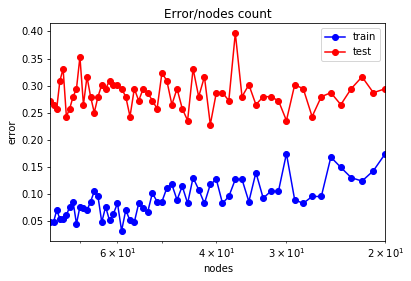

In [65]:
nodes_arr_1 = np.arange(20, 80, 1)
test_err = []
train_err = []
for nodes in nodes_arr_1:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
nodes_opt_1 = nodes_arr_1[test_err == min_test_err][0]
print(nodes_opt_1)

plt.semilogx(nodes_arr_1, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_1, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr_1), np.min(nodes_arr_1)])
plt.title('Error/nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()
pass

Имеем: лучше всего брать для нейронной сети с одним скрытым слоем 30 нейронов. 

# Два скрытых слоя

Посмотрим эту же зависимость, но уже для сети с двумя скрытыми слоями

Лучшее значение ошибки:
0.0474683544304 0.213235294118
Оптимальное количество нейронов:
60


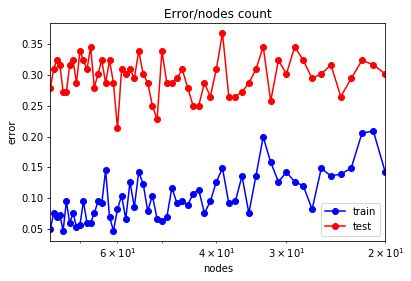

In [66]:
nodes_arr_2 = np.arange(20, 80, 1)
test_err = []
train_err = []
for nodes in nodes_arr_2:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes, nodes), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
nodes_opt_2 = nodes_arr_2[test_err == min_test_err][0]
print(nodes_opt_2)

plt.semilogx(nodes_arr_2, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_2, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr_2), np.min(nodes_arr_2)])
plt.title('Error/nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()
pass

Везде наблюдаем переобучение.

# Подбор параметра регуляризации alpha

Берем двуслойную сеть, так как на тестовых данных она отработала лучше. Оптимальное количество нейронов в таком случае составляет 33 нейрона.

Лучшее значение ошибки:
0.0569620253165 0.227941176471
Оптимальное значение alpha:
0.000686648845004


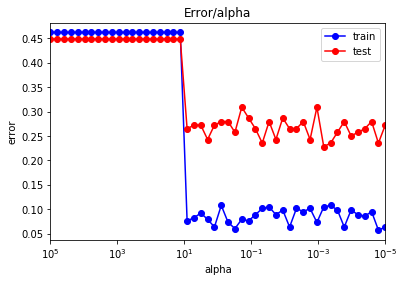

In [67]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение alpha:")
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error/alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

# Классификация с учетом оптимальных параметров

Мы нашли оптимальное значение параметра альфа и наилучшее значенин количества нейронов для двуслойной нейронной сети. Проверим, какие результаты выдаст классификатор с найденными параметрами.

In [68]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на обучающей выборке: %s " %np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: %s " %np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке: 0.104430379747 
Ошибка на тестовой выборке: 0.227941176471 


# Деревья

# Random Forest

Посмотрим результаты на Random Forest(случайный лес). Для этого используем ensemble. Поставим значение эстиматоров равное 300.  Позднее выберем наиболее оптимальное значение.

In [69]:
from sklearn import ensemble
n_estim = 300
rf_model=ensemble.RandomForestClassifier(n_estimators=n_estim,oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

Посчитаем ошибки на тестовой и обучающей выборке

In [70]:
err_train=np.mean(y_train !=rf_model.predict(X_train))
err_test=np.mean(y_test !=rf_model.predict(X_test))
print(err_train,err_test)

0.0 0.25


Получаем переобучение(делаем такой выбор, потому что ошибка на тесте больше ошибки на обучении). Разница большая, думаю мы далеки от оптимального значения эстиматора

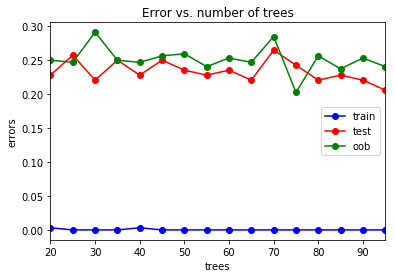

In [71]:
trees_arr=np.arange(20,100,5)
test_err=[]
train_err=[]
oob_err=[]
for trees in trees_arr:
    rf=ensemble.RandomForestClassifier(n_estimators=trees,oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1-rf.oob_score_)
    
plt.plot(trees_arr,train_err,'b-o',label='train')
plt.plot(trees_arr,test_err,'r-o',label='test')
plt.plot(trees_arr,oob_err,'g-o',label='oob')
plt.xlim([np.min(trees_arr),np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('errors')
plt.legend()
pass

Снова наблюдаем переобучение(синий график ниже красного.И значительно).Минимум oob-ошибки наблюдаем при количестве деревьев =75.

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.205882352941


In [73]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[95]


Оптимальное количество деревьев - 75

# Extremely Randomized Trees

In [74]:
ert=ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train,y_train)

err_train=np.mean(y_train!=ert.predict(X_train))
err_test=np.mean(y_test!=ert.predict(X_test))

print(err_train,err_test)

0.0 0.213235294118


Снова наблюдаем переобучение.(ошибка в бою больше ошибки на обучении). Выберем параметр деревьев получше

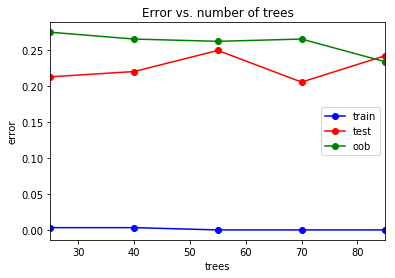

In [75]:
trees_arr=np.arange(25, 100, 15)
test_err=[]
train_err=[]
oob_err=[]
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=trees,oob_score=True)
    rf.fit(X_train,y_train)
    train_err.append(np.mean(y_train!=rf.predict(X_train)))
    test_err.append(np.mean(y_test!=rf.predict(X_test)))
    oob_err.append(1-rf.oob_score_)
    
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(trees_arr), np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [76]:
min_train_err=np.min(train_err)
min_test_err=np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.205882352941


Минимальное значение ошибки на тесте составляет почти 0.206. Попробуем найти оптимальное количество деревьев.

In [77]:
trees_opt=trees_arr[test_err==min_test_err]
print(trees_opt)

[70]


# AdaBoost

In [78]:
ada=ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train,y_train)

err_train=np.mean(y_train!=ada.predict(X_train))
err_test=np.mean(y_test!=ada.predict(X_test))

print(err_train,err_test)

0.0 0.272058823529


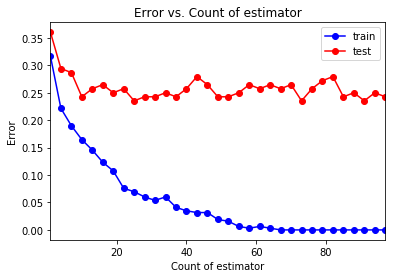

In [79]:
estimator_arr=np.arange(1,100,3)
test_err=[]
train_err=[]
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators=estimator)
    ab.fit(X_train,y_train)
    train_err.append(np.mean(y_train!=ab.predict(X_train)))
    test_err.append(np.mean(y_test!=ab.predict(X_test)))
    
plt.plot(estimator_arr,train_err,'b-o',label='train')
plt.plot(estimator_arr,test_err,'r-o',label='test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

Снова наблюдаем переобучение. По мере увеличения количества деревьем, разрыв между ошибкой на тесте и на обучении увеличивается. Найдем минимальное значение ошибки и оптимальное число деревьев.

In [80]:
min_train_err=np.min(train_err)
min_test_err=np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.235294117647


In [81]:
estimator_opt=estimator_arr[test_err==min_test_err]
print(estimator_opt)

[25 73 91]


Оптимальное число деревьев для адабуста составляет 25,73 и 91

# GBT

In [82]:
gbt=ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train,y_train)

err_train=np.mean(y_train!=gbt.predict(X_train))
err_test=np.mean(y_test!=gbt.predict(X_test))

print(err_train,err_test)

0.0 0.191176470588


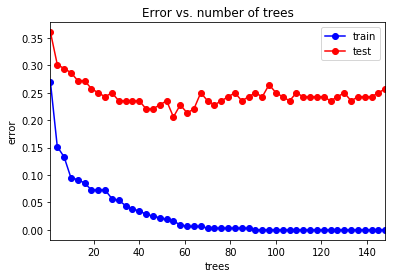

In [83]:
trees_arr = np.arange(1,150, 3)
test_err=[]
train_err=[]
for trees in trees_arr:
    gbt=ensemble.GradientBoostingClassifier(n_estimators=trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train!=gbt.predict(X_train)))
    test_err.append(np.mean(y_test!=gbt.predict(X_test)))

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(trees_arr), np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение.Посмотрим минимальное значение ошибки. С помощью этих данных найдем оптимальное количество деревьев.

In [84]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.205882352941


In [85]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[55]


Лучшим методом стал GTB с ошибкой на тесте в 0.191176470588

# PCA

Теперь поэксперементируем с размерностью и рассмотрим PCA. Вспомним нашу текущую размерность.

In [86]:
X.shape

(452, 274)

В исходных данных 274 столбцов, попробуем сократить до 50. Предварительно обучим PCA

In [151]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(X)
pca_x=pca.transform(X)
pca_x.shape

(452, 50)

In [152]:
X_train,X_test,y_train,y_test=train_test_split(pca_x,y,test_size=0.33,random_state = 5)

Разбили вновь на тестувую и обучающую выборки. Для анализа попробуем прогнать через классификатор RandomForest. Берем количество деревьев равное 55

In [153]:
from sklearn import ensemble
rf=ensemble.RandomForestClassifier(n_estimators = 55)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
err_train=np.mean(y_train!= rf.predict(X_train))
err_test=np.mean(y_test!= rf.predict(X_test))

print("TrainError", err_train)
print("TestError", err_test)

TrainError 0.0
TestError 0.293333333333


Благодаря сокращению размерности мы увеличили значение ошибки на тестовой выборке с 0.191 до 0.293.  Переобучение всё еще наблюдаем. Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент. Вдруг сработает для другого количества компонент

In [157]:
components_arr = np.arange(1, 50, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = number)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 1)
    rf = ensemble.RandomForestClassifier(n_estimators = 40, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

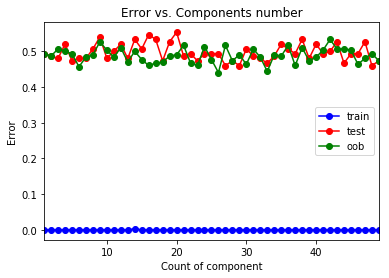

In [158]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Видно, что переобучение одинаково для всех параметров.

In [159]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min trainError", min_train_err)
print("Min testError", min_test_err)

Min trainError 0.0
Min testError 0.46


In [160]:
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[27 29 48]


Оптимальное количество количество компонент для конкретного случая = 27,29 и 48. Создается впечатление, что при рассмотрении другого классификатора PCA даст больше пользы.